In [5]:
import mysql.connector, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
#Import Libraries

In [4]:
conn=mysql.connector.connect(host='localhost',
                            database='student_db',
                            user='root',
                            password='pm07111996')
#Establish connection with MySQL

In [7]:
df=pd.read_sql("SELECT * FROM STUDENT_MARKS;",conn)
#Read SQL Query and import into a DataFrame

In [10]:
df.head()
#Check head of DataFrame

,NAME,GENDER,DOB,MATHS,PHYSICS,CHEMISTRY,ENGLISH,BIOLOGY,ECONOMICS,HISTORY,CIVICS
0,John,M,1988-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53


In [11]:
df.info()
#Check Column info of DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NAME       10 non-null     object
 1   GENDER     10 non-null     object
 2   DOB        10 non-null     object
 3   MATHS      10 non-null     int64 
 4   PHYSICS    10 non-null     int64 
 5   CHEMISTRY  10 non-null     int64 
 6   ENGLISH    10 non-null     int64 
 7   BIOLOGY    10 non-null     int64 
 8   ECONOMICS  10 non-null     int64 
 9   HISTORY    10 non-null     int64 
 10  CIVICS     10 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1008.0+ bytes


In [12]:
df['DOB']=pd.to_datetime(df['DOB'],format='%Y-%m-%d')
#Change DOB column to datetime format

In [44]:
df.describe()
#Check Stats of all the columns

,MATHS,PHYSICS,CHEMISTRY,ENGLISH,BIOLOGY,ECONOMICS,HISTORY,CIVICS
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


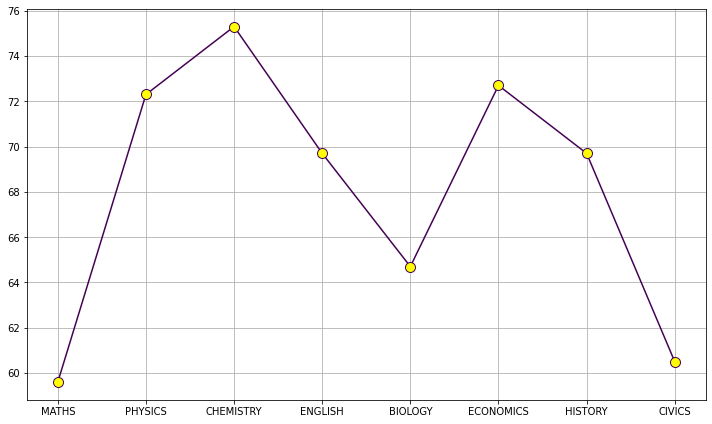

In [46]:
plt.figure(figsize=(10,6))
df.describe().loc['mean'].plot(colormap='viridis',grid=True,marker='o',markerfacecolor='yellow',ms=10)
plt.tight_layout()
#Here we can see that the average count of students got maximum marks in Chemistry

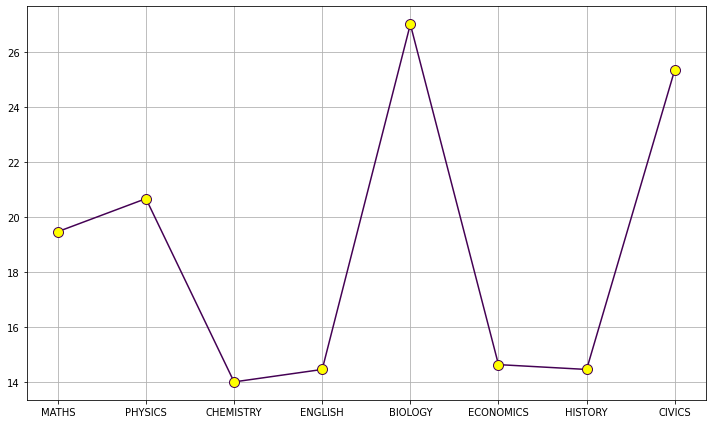

In [47]:
plt.figure(figsize=(10,6))
df.describe().loc['std'].plot(colormap='viridis',grid=True,marker='o',markerfacecolor='yellow',ms=10)
plt.tight_layout()
#Marks of students in Biology are highly deviated

In [68]:
df['TOTAL']=df.iloc[:,3:].sum(axis=1)
#Finding total marks of each student

In [69]:
df.head()

,NAME,GENDER,DOB,MATHS,PHYSICS,CHEMISTRY,ENGLISH,BIOLOGY,ECONOMICS,HISTORY,CIVICS,TOTAL
0,John,M,1988-04-05,55,45,56,87,21,52,89,65,470
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2,524
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74,556
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45,586
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53,587


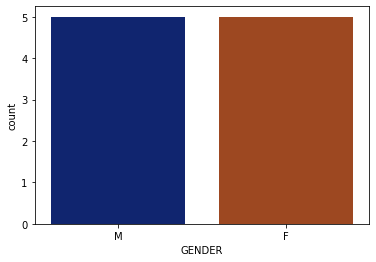

In [96]:
sns.countplot(x='GENDER',data=df,palette='dark')
plt.show()
#Count of students are equal

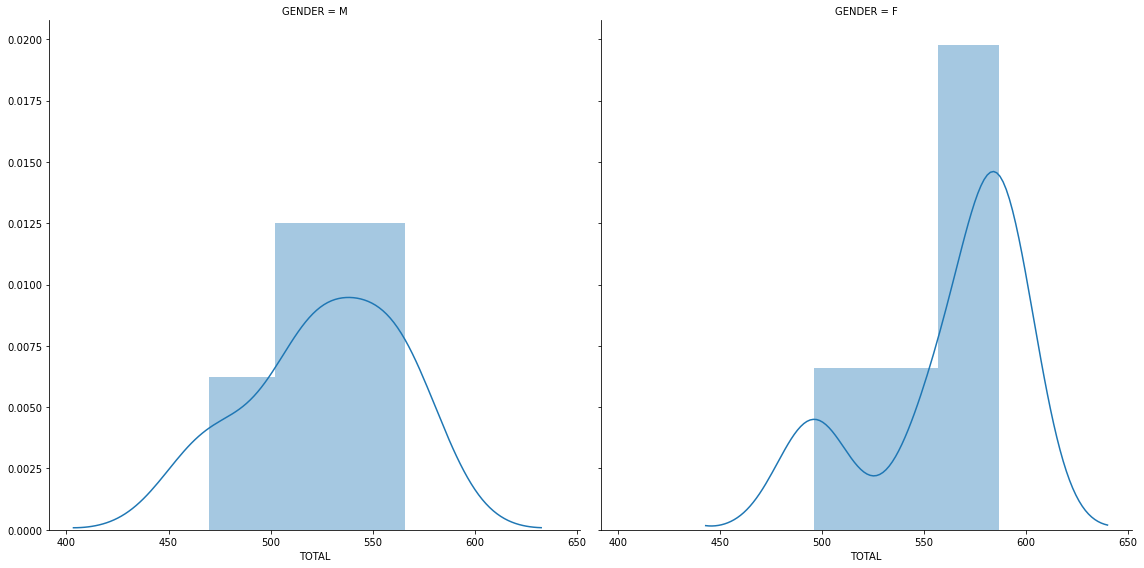

In [119]:
sf=sns.FacetGrid(col='GENDER',data=df,height=8,aspect=1)
sf.map(sns.distplot,'TOTAL',hist=True,vertical=False)
plt.show()
#From the below graph we can see that the total of Male students is normally distributed while for females
#there are some sharp spikes

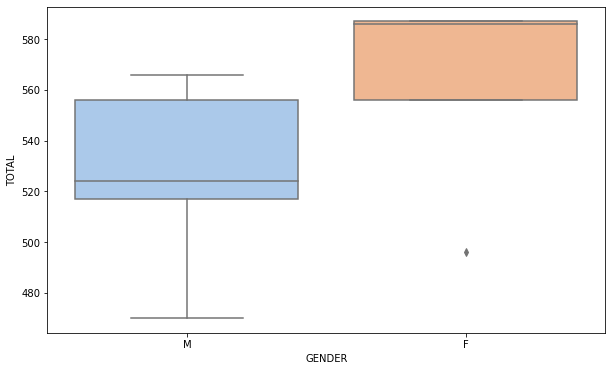

In [95]:
plt.figure(figsize=(10,6))
sns.boxplot(x='GENDER',y='TOTAL',data=df,palette='pastel')
plt.show()
#Mean of total of males is less then females
#There is an outlier in Females

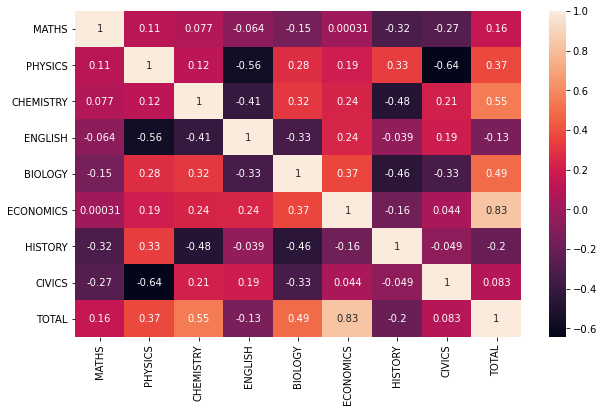

In [122]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()
#Economics and Total are highly correlated

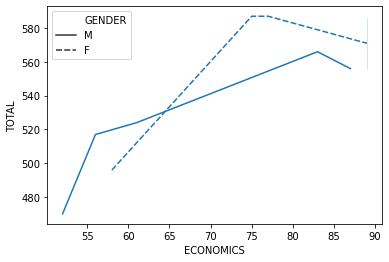

In [141]:
sns.lineplot(x='ECONOMICS',y='TOTAL',data=df,style='GENDER')
plt.show()
#As seen above Total increases with increase in Economics Marks